# Ingeniería de prompts para ciencia de datos
Este módulo se centra en la creación de prompts efectivos para interactuar con modelos de lenguaje avanzados como GPT-4. Aprenderás técnicas para diseñar prompts que generen respuestas precisas y útiles, optimizando la comunicación con la IA para diversas aplicaciones.
## Contenidos
- **Introducción a los modelos de lenguaje:** Comprende cómo funcionan los modelos de lenguaje y sus capacidades.
- **Técnicas de diseño de prompts:** Aprende a estructurar prompts para obtener resultados específicos.
- **Evaluación de respuestas:** Desarrolla habilidades para evaluar la calidad de las respuestas generadas por la IA.
- **Aplicaciones prácticas:** Explora casos de uso en diferentes industrias y contextos.

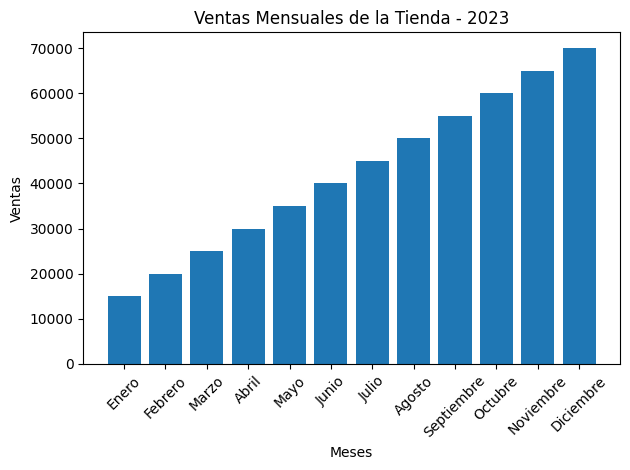

In [1]:
import matplotlib.pyplot as plt

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas = [15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]

plt.bar(meses, ventas)
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de la Tienda - 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Prompt:
Genera un gráfico para mostrar las expectativas de vida de los países con mayor expectativa (top 20) desde 1960 hasta 2025 usando matplotlib o seaborn, utiliza los datos de gdp_lifeExpectancy, localiza este archivo en Internet (localizaciones reales) y carga los datos en un DataFrame de pandas. Carga las librerias necesarias para acceder al archivo y para manipular los datos.

### ChatGPT 5 respuesta:

In [7]:
# -*- coding: utf-8 -*-
# Notebook: Expectativa de Vida – EVA (Top 20 países)
# Autor: ChatGPT para tu proyecto EVA
# Fecha: (generada automáticamente)

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración gráfica
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14,10)

# 2. Definir URL del dataset
# Uso del indicador “Life expectancy at birth, total (years)” del World Bank. :contentReference[oaicite:1]{index=1}
url = "https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv"

# 3. Cargar el CSV
# Nota: El archivo descargado contiene varias hojas y encabezados personalizados — puede requerir saltar filas.
df_raw = pd.read_csv(url, skiprows=4)
# Ajuste básico de columnas
df_raw = df_raw.rename(columns={"Country Name": "country",
                                "Country Code": "iso3"})
# 4. Filtrar años relevantes (1960–2025)
# Determinar lista de años como cadenas
years = [str(y) for y in range(1960, 2026)]
available_years = [y for y in years if y in df_raw.columns]
df = df_raw[["country","iso3"] + available_years]

# 5. Transformar a formato "largo" (melt)
df_long = df.melt(id_vars=["country","iso3"],
                  value_vars=available_years,
                  var_name="year",
                  value_name="life_expectancy")
df_long["year"] = df_long["year"].astype(int)

# 6. Limpiar datos: eliminar filas sin valor
df_long = df_long.dropna(subset=["life_expectancy"])

# 7. Seleccionar Top 20 países por expectativa de vida en el año más reciente del dataset
last_year = df_long["year"].max()
top20_countries = (df_long[df_long["year"] == last_year]
                   .sort_values(by="life_expectancy", ascending=False)
                   .head(20)["country"].tolist())
print(f"Año más reciente en los datos: {last_year}")
print("Top 20 países por expectativa de vida:", top20_countries)

# Filtrar sólo esos países
df_top20 = df_long[df_long["country"].isin(top20_countries)]

# 8. Graficar evolución temporal
plt.figure()
sns.lineplot(data=df_top20,
             x="year",
             y="life_expectancy",
             hue="country",
             palette="tab20",
             legend="full",
             lw=2)

plt.title(f"Expectativa de vida al nacer (años) – Top 20 países (hasta {last_year})", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Expectativa de vida (años)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# 9. Guardar gráfico como archivo
plt.savefig("top20_life_expectancy_1960_to_{0}.png".format(last_year), dpi=300)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

### Qwen3-max respuesta:

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load real life expectancy data from Gapminder (public GitHub repository)
url = 'https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv'
df = pd.read_csv(url)

# Display basic info (optional)
print("Data loaded. Years range from", df['year'].min(), "to", df['year'].max())
print("Number of countries:", df['country'].nunique())

# Step 2: Filter data for the last 20 years available
max_year = df['year'].max()
start_year = max_year - 20
df_last20 = df[df['year'] >= start_year].copy()

# Step 3: For each country, get its most recent life expectancy within this period
latest_data = df_last20.loc[df_last20.groupby('country')['year'].idxmax()]

# Step 4: Select top 20 countries by life expectancy
top20_countries = latest_data.nlargest(20, 'lifeExp')['country'].tolist()

# Step 5: Extract full time series for these top 20 countries over the last 20 years
df_top20 = df[df['country'].isin(top20_countries) & (df['year'] >= start_year)]

# Step 6: Plot life expectancy trends
plt.figure(figsize=(14, 8))

for country in top20_countries:
    country_data = df_top20[df_top20['country'] == country]
    plt.plot(country_data['year'], country_data['lifeExp'], marker='o', label=country)

plt.title('Life Expectancy of Top 20 Countries (Last 20 Years)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy at Birth (years)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### DeepSek

In [5]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Obtener datos del Banco Mundial
indicador = 'SP.DYN.LE00.IN'  # Código del indicador de esperanza de vida
paises = wb.get_countries()
paises_ingresos_altos = paises[paises['incomeLevel'] != 'Aggregates']['iso3c'].tolist()

# Últimos 20 años disponibles (2003-2022)
años = [str(y) for y in range(2003, 2023)]
datos = wb.download(indicator=indicador, country=paises_ingresos_altos, start=2003, end=2022)

# Procesar datos
datos_limpios = datos.reset_index()
datos_limpios['year'] = datos_limpios['year'].astype(int)
datos_promedio = datos_limpios.groupby('country')['SP.DYN.LE00.IN'].mean().sort_values(ascending=False)

# Top 20 países
top_20_paises = datos_promedio.head(20).index.tolist()
datos_top20 = datos_limpios[datos_limpios['country'].isin(top_20_paises)]

# Crear gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=datos_top20, x='year', y='SP.DYN.LE00.IN', hue='country', linewidth=2.5)
plt.title('Evolución de la Esperanza de Vida al Nacer (2003-2022)\nTop 20 Países con Mayor Esperanza de Vida Promedio', 
          fontsize=14, pad=20)
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida (años)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='País')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar tabla con promedios
print("Promedio de esperanza de vida (2003-2022):")
pd.DataFrame(datos_promedio.head(20)).round(1)

ModuleNotFoundError: No module named 'distutils'